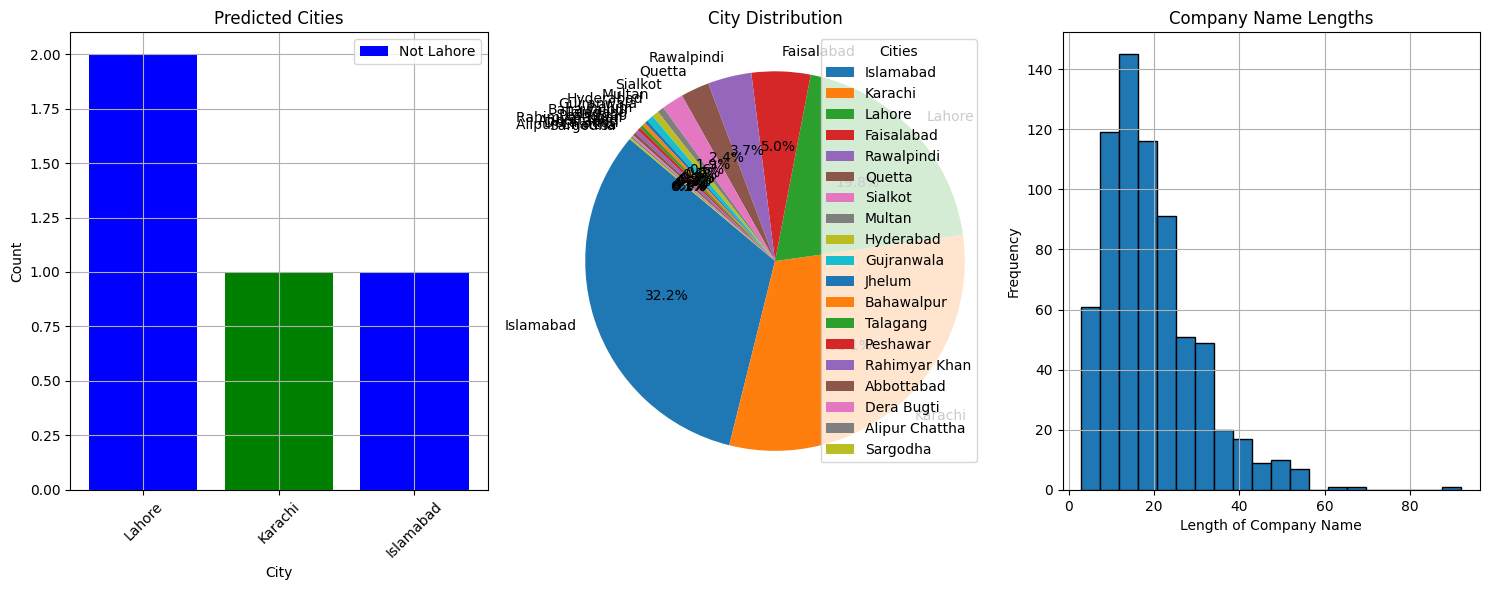


Detailed Predictions:
    Company Name Predicted City
  FA Consultants         Lahore
     HAW Company        Karachi
Tech Innovations      Islamabad
    Connect HRMS         Lahore


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib

# Load the dataset
file_path = '/content/drive/MyDrive/Softwares.csv'
df = pd.read_csv(file_path)

# Clean the dataset
df_clean = df.dropna(subset=['City', 'Company Name']).copy()  # Use .copy() to avoid SettingWithCopyWarning

# Model training
X = df_clean['Company Name']
y = df_clean['City']

# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_vec, y)

# Save the model to file
model_file = '/content/drive/MyDrive/naive_bayes_model.pkl'
joblib.dump(model, model_file)

# Load the model from file
loaded_model = joblib.load(model_file)

# Example of testing with custom input
custom_input = [
    "FA Consultants",
    "HAW Company",
    "Tech Innovations",
    "Connect HRMS"
]

def predict_city(company_names):
    custom_input_vec = vectorizer.transform(company_names)
    custom_pred = loaded_model.predict(custom_input_vec)
    return custom_pred

# Predict city for custom input
predictions = predict_city(custom_input)

# Display results using pandas and matplotlib
results_df = pd.DataFrame({
    'Company Name': custom_input,
    'Predicted City': predictions
})

# Group and count predictions to get the correct format for the bar plot
city_counts = results_df['Predicted City'].value_counts()

# Plotting the results using the city counts
plt.figure(figsize=(15, 6))

# Bar plot for city predictions
plt.subplot(1, 3, 1)
plt.bar(city_counts.index, city_counts.values, color=['blue', 'green'])
plt.title('Predicted Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Not Lahore', 'Lahore'], loc='upper right')
plt.grid(True)

# Pie chart for city distribution in dataset
city_distribution = df_clean['City'].value_counts()
plt.subplot(1, 3, 2)
plt.pie(city_distribution.values, labels=city_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('City Distribution')
plt.legend(title='Cities', loc='upper right')

# Histogram of company name lengths
company_name_lengths = X.apply(len)
plt.subplot(1, 3, 3)
plt.hist(company_name_lengths, bins=20, edgecolor='black')
plt.title('Company Name Lengths')
plt.xlabel('Length of Company Name')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Display detailed results
print("\nDetailed Predictions:")
print(results_df.to_string(index=False))
